In [2]:
#Signals: In general, when we work with continuous signals in computation,we must discretize it at uniform distances.
#Here is when the Shannon-Nyquist theorem enters; This theorem gives us a series of specific conditions under a continuous signal 
# is recovered from a series of samples.

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import fftpack
from scipy import signal 
import scipy.io.wavfile
from scipy import io

In [15]:
def signal_samples(t):
    return(2*np.sin(2*np.pi*t)+3*np.sin(22*2*np.pi*t)+2*np.random.rand(len(t)))

In [16]:
B=30
f_s=2*B
delta_f=0.01
N=int(f_s/delta_f);
T=N/f_s

In [17]:
t=np.linspace(0,T,N)

In [18]:
f_t=signal_samples(t)

Text(0.5, 0, 'Time(t)')

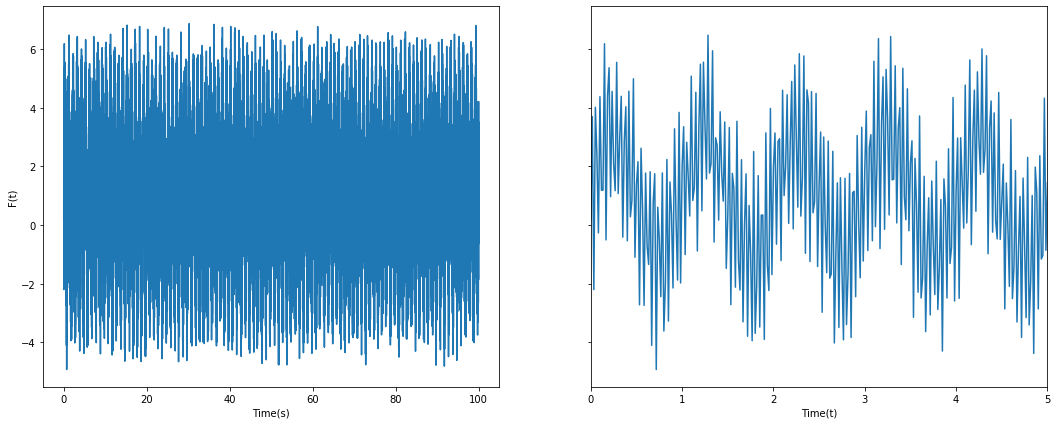

In [24]:
fig,axes=plt.subplots(1,2,figsize=(18,7),sharey=True)
axes[0].plot(t,f_t)
axes[0].set_xlabel('Time(s)')
axes[0].set_ylabel('F(t)')
axes[1].plot(t,f_t)
axes[1].set_xlim(0,5)
axes[1].set_xlabel('Time(t)')

In [25]:
F=fftpack.fft(f_t) # Contains a vector of the frequency components determined by sampling rate and the number of samples

In [26]:
# This function takes the number of samples and the time duration between succesive samples as parameters and returns an array
#of the same size of as F that contains the frequencies corresponding to each frequency bin

In [28]:
f=fftpack.fftfreq(N,1.0/f_s)

In [32]:
mask=np.where(f>0)

Text(0, 0.5, 'F(omega)')

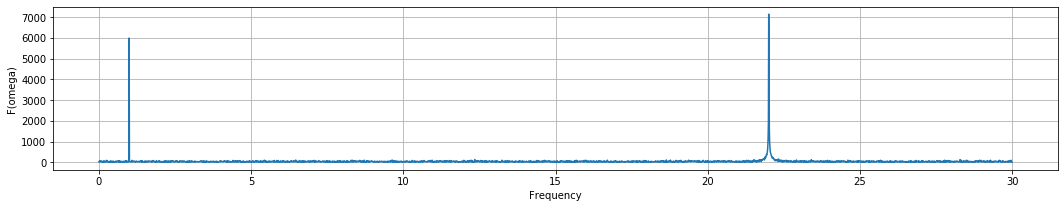

In [37]:
plt.figure(figsize=(18,3))
plt.plot(f[mask],abs(F[mask]))
plt.grid()
plt.xlabel('Frequency')
plt.ylabel('F(omega)')

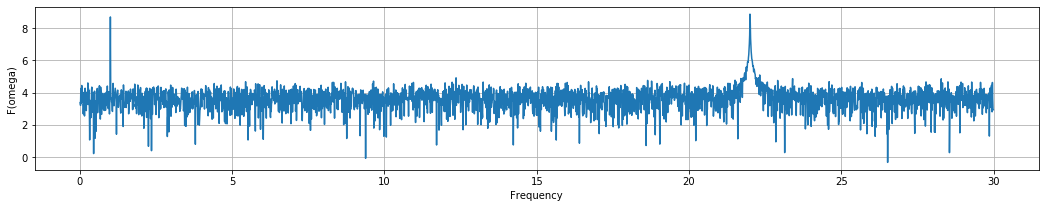

In [39]:
plt.figure(figsize=(18,3))
plt.plot(f[mask],np.log(abs(F[mask])))
plt.xlabel('Frequency')
plt.ylabel('F(omega)')
plt.grid()

In [40]:
#We can select the frequencies above 2Hz, is the same as the application of a 2Hz low-pass filter.
F_filtered=F*(abs(f)<2)
f_t_filtered=fftpack.ifft(F_filtered)

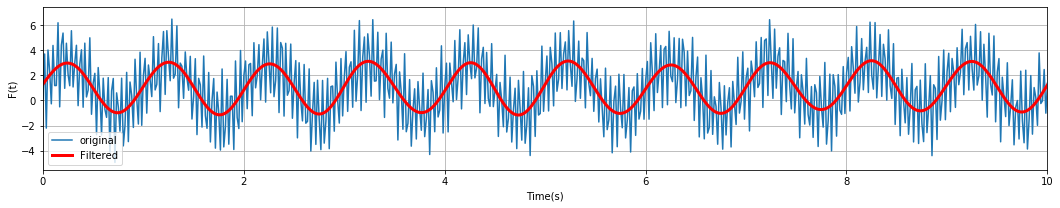

In [44]:
plt.figure(figsize=(18,3))
plt.plot(t,f_t,label='original')
plt.plot(t,f_t_filtered.real,color='red',lw=3,label='Filtered')
plt.grid()
plt.xlabel('Time(s)')
plt.ylabel('F(t)')
plt.xlim(0,10)
plt.legend()

In [45]:
import pandas as pd

In [47]:
pd.date_range("2015-1-1", periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [92]:
df1=pd.read_csv('temperature_outdoor_2014.tsv',delimiter="\t",names=["time","temperatures"])
df2=pd.read_csv('temperature_indoor_2014.tsv',delimiter="\t",names=["time","indoor"])

In [70]:
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [71]:
df1.time=(pd.to_datetime(df1.time.values,unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm'))
df1=df1.set_index("time")

In [72]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [73]:
df2.time=(pd.to_datetime(df2.time.values,unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm'))
df2=df2.set_index("time")
df2.head()

,indoor
time,
2014-01-01 00:03:06+01:00,21.94
2014-01-01 00:13:06+01:00,22.00
2014-01-01 00:23:07+01:00,22.00
2014-01-01 00:33:07+01:00,22.00
2014-01-01 00:43:08+01:00,22.00


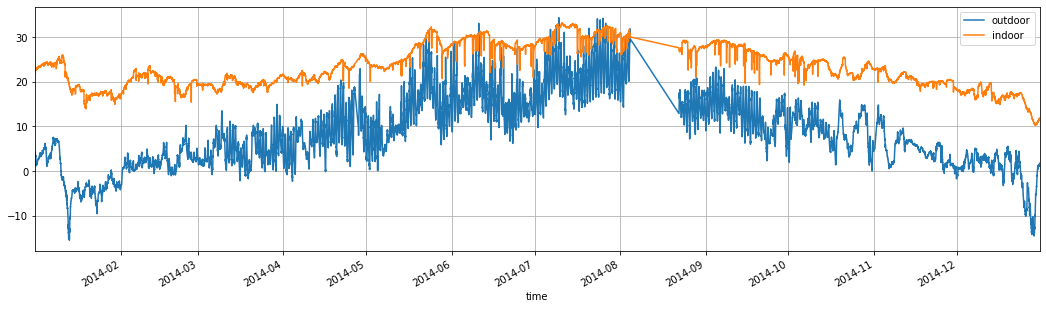

In [74]:
fig,ax=plt.subplots(1,1,figsize=(18,5))
df1.plot(ax=ax)
df2.plot(ax=ax)
plt.grid()

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49548 entries, 2014-01-01 00:03:06+01:00 to 2014-12-30 23:56:35+01:00
Data columns (total 1 columns):
outdoor    49548 non-null float64
dtypes: float64(1)
memory usage: 774.2 KB


In [80]:
#The full dataset contains all the information of 2014, but we can select select a month from this data set
#lets mask the octuber month.
mask_oct=(df1.index>='2014-10-1')&(df1.index<'2014-11-1') #here is the mask
df1_oct=df1[mask_oct]

In [81]:
df2_oct=df2["2014-10-1":"2014-10-31"]

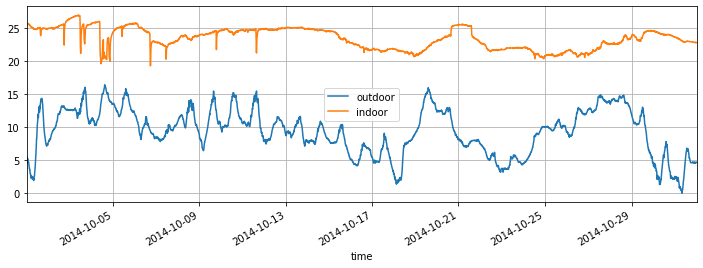

In [83]:
fig,ax=plt.subplots(1,1,figsize=(12,4))
df1_oct.plot(ax=ax)
df2_oct.plot(ax=ax)
plt.grid()

In [94]:
df1=pd.read_csv('temperature_outdoor_2014.tsv',delimiter="\t",names=["time","temperature"])
df1.time=(pd.to_datetime(df1.time.values,unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm'))
df1=df1.set_index("time")

In [95]:
df1=df1.resample("H").ffill()
df1=df1[(df1.index>="2014-04-01")*(df1.index<"2014-06-01")].dropna()

In [96]:
time=df1.index.astype('int64')/1.0e9
temperature=df1.temperature.values

In [101]:
window=signal.blackman(len(temperature))

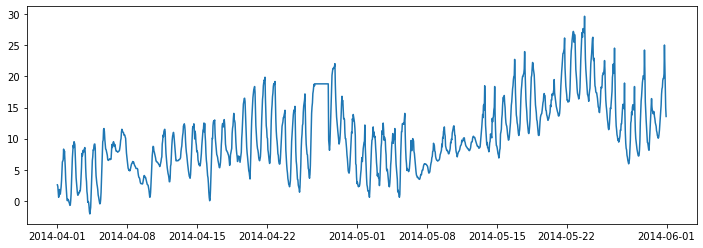

In [105]:
plt.figure(figsize=(12,4))
plt.plot(df1.index,temperature)

In [106]:
temperature_windowed=temperature*window

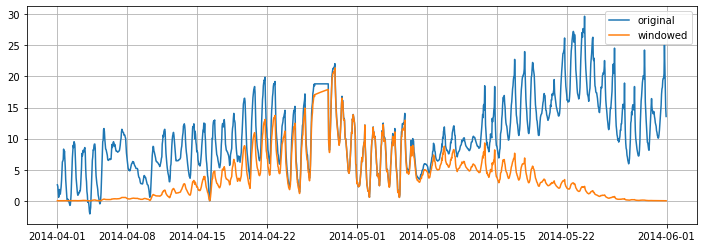

In [107]:
plt.figure(figsize=(12,4))
plt.plot(df1.index,temperature,label='original')
plt.plot(df1.index,temperature_windowed,label='windowed')
plt.grid()
plt.legend()

In [109]:
import IPython.display as ipd

In [110]:
sample_rate,data=io.wavfile.read("dchapiro.wav")

In [111]:
sample_rate

44100

In [112]:
data.shape

(541668,)

In [114]:
ipd.Audio(data,rate=sample_rate)

In [116]:
data.shape[0]/sample_rate

12.282721088435375

In [140]:
N=int(sample_rate);N

44100

In [168]:
f=fftpack.fftfreq(len(data),1.0/sample_rate)
mask=(f>0)

In [169]:
F=fftpack.fft(data)

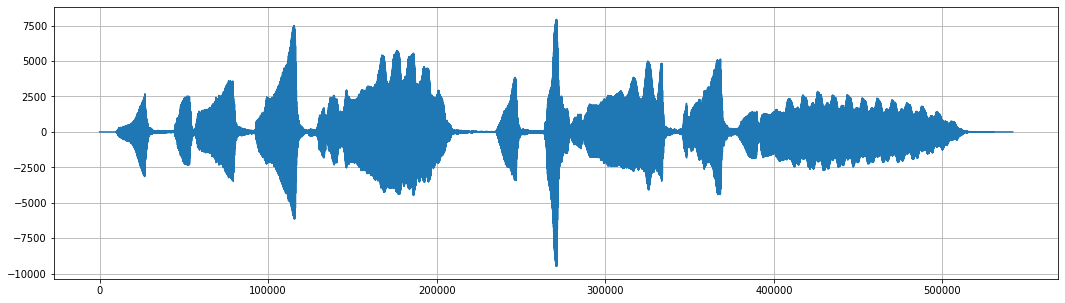

In [170]:
plt.figure(figsize=(18,5))
plt.plot(data)
plt.grid()

In [171]:
ipd.Audio(data,rate=N)

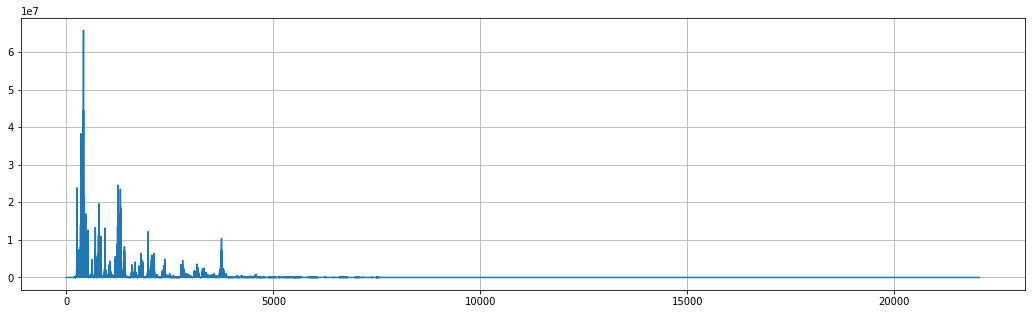

In [188]:
plt.figure(figsize=(18,5))
plt.plot(f[mask],(abs(F[mask])))
plt.grid()